# Particles in a box, version 2


Lo scopo di questa simulaione è di simulare uno scenario dove sono presenti un numero fisso di particelle che si muovono dentro un box quadrato e collidono tra di esse e con le pareti del box senza dispersione di Energia. In questo caso possiamo chiamare questo tipo di collisioni Collisioni Elastiche. Nella scatola le caratteristiche fisiche sono le seguenti:

- Ogni particella possiede una massa, una forma e una velocità composte da 2 componenti( orizzontali e verticali):
    
        - Il raggio è uguale per tutte le particelle nella scatola;
        - La forma è uguale per tutte le particelle nella scatola rappresentata come cerchio di raggio costante;
        - Sono presenti 2 masse differenti MA, MB;
        - La velocità iniziale è inizializzata con un numero casuale nel range [-1, 1];
        
- Esistono due tipi di collisioni nello scenario:

        - Collisioni delle particelle contro le pareti del box;
        - Collisioni delle particelle tra le stesse; 

- Ogni particella è caratterizzata da una Eki e una Ui corrispondenti alla Energia Cinetica e potenziale.

- Ogni particella in movimento nella scatola è attratta verso il basso a causa dell'esistenza della forza di gravità;





        

# Importazione Librerie
In questa sezione ho importato varie librerie di cui ho bisogno per costruire la simulazione

In [1]:
from matplotlib import pyplot as plt        # Questa libreria consente di creare grafici di cui abbiamo bisogno
import random as rnd                        #random Libreria random per inizializzare valori di ciascuna particella
import numpy as np                          #numpy Libreria usata per creare e manipolare matrici 
import math                                 #math Libreria che ci offre di svolgere operazioni matematiche

                                            # Librerie per eseguire l'animazione della simulazione
from matplotlib import animation
from IPython.display import HTML

# Definizione Variabili
Per il seguente progetto ho scelto di rappresentare le particella i-esima una matrice in 3 dimensioni.
La ragione di questa scelta è di rendere semplice la rappresentazione delle particelle visto che possiamo ottenere i dati di ogni particella usando un unica struttura dati.
La prima dimensione rappresenta l'id di ogni particella, la seconda dimensione rappresenta il tempo t in cui consideriamo la particella e la terza dimensione rappresenta vari campi che descrivono vari aspetti fisici come:

        - La posizione x;
        - La posizione y;
        - Componente x della velocità;
        - Componente y della velocità;
        - Velocità relativa data dal teorema di Pitagora;
        - Energia Cinetica della particella;
        - Energia Potenziale della particella;
        
Ho scelto di usare due variabili dimBoxX e dimBoxY per permettere all'utente di settare la lunghezza e larghezza della scatola.
Inoltre gli utenti possono scegliere l'indice delle due particelle che saranno restituite a video dalla funzione PlotTwoParticlesIndt().


In [2]:
numeroPartA = 30;            # Numero di particelle A
numeroPartB = 30;            # Numero di particelle B

massaPartA = 0.025;          # Massa particelle tipo A
massaPartB = 0.05;           # Massa particelle tipo B

raggioPart = 0.04;           # Raggio delle particelle
intervalloVel = [-1, 1];     # intervallo della velocità che può assumere una particella
gravita = 9.81;              # Accelerazione di gravità
T = 1;                       # Periodo 
dt = 0.01;                   # tempo
campioniPerdt = int(T/dt)+1; # Numero di campioni in T per dt
dimBoxX = 4;                 # Dimensione x del Box 
dimBoxY = 4;                 # Dimensione y del Box 

# Indice delle due particelle che saranno per prime restituite a video con la funzione PlotTwoParticlesIndt()
primaPartdaPlot = 3;
secondaPartdaPlot = 5;

# Creazione di una matrice tridimensionale per ogni tipo di particella ( A, B) contenente 7 campi: x, y, vx, vy, v, Ek, Ui
particelleA = np.zeros((numeroPartA ,campioniPerdt,7),'d');
particelleB = np.zeros((numeroPartB ,campioniPerdt,7),'d');

# Vettori necessari per disegnare il box
boxX = [0,dimBoxX,dimBoxX,0,0]
boxY = [0,0,dimBoxY,dimBoxY,0]


# Definizioni di Funzioni
In questa sezione si definiscono e si spiegano tutte le funzioni che ci serviranno per far si che la simulazione funzioni.

Per la realizzazione del controllo delle collisioni si procede con i seguenti passi:

        - Iniziando copiando tutti i dati della particella considerata al tempo t-1 in quella al tempo t.
        - Per prima cosa consideriamo le collisioni con i limiti calcolando la distanza tra la posizione x della particella e la quantità x limite della scatola e poi tra la posizione y della particella e la quantità y limite della scatola e in caso di collisione (x particella = x scatola o y particella = y scatola) invertiamo le componenti della velocità.
        - Dobbiamo controllare le collisioni tra le particelle stesse calcolando la distanza tra ogni coppia e in caso di collisione, i componenti velocità della prima particella della coppia vengono scambiate con la componente della seconda.
        - infine dobbiamo calcolare la nuova posizione e altri campi in t consideradoli come un aggiornamento dei valori.
        
        
Inoltre ci sono altre 5 funzioni per restituire a video il comportamento dell'energia in dt:

        - Una funzione che restituisce a video il comportamento dell'energia cinetica sull'asse x in dt.
        - Una funzione che restituisce a video il comportamento dell'energia cinetica sull'asse y in dt
        - Una funzione che restituisce a video il comportamento dell'energia cinetica in dt.
        - Una funzione che restituisce a video il comportamento dell'energia Potenziale in dt.
        - Una funzione che restituisce a video il comportamento dell'energia Meccanica in dt.
        
        
        
    
    
        

In [3]:
# Funzione che restituisce un numero random in un intervallo tra due valori
def generatoreNumCas(n1, n2):
    # restituisco un valore casuale di una distribuzione uniforme tra n1, n2
    return rnd.uniform(n1, n2);

# Dando i due valori delle velocità(velX, velY), calcola la velocità (v) usando il teorema di pitagora
def velocita(velX, velY):
    return math.sqrt(velX**2+velY**2);

# dato che la velY**2 = velocita**2 - velX**2 possiamo calcolare l'energia cinetica
# su x Eky = 1/2 * mass * velY**2. Passo alla funzione la massa cosi che mi possa restituire sia
# l'energia cinetica di A e di B.
def EnergiaCinY(vel, velX, massa):
    return (0.5 * (vel**2 - velX**2) * massa);

# dato che la velX**2 = velocita**2 - velY**2 possiamo calcolare l'energia cinetica
# su x Ekx = 1/2 * mass * velX**2. Passo alla funzione la massa cosi che mi possa restituire sia
# l'energia cinetica di A e di B.
def EnergiaCinX(vel, velY, massa):
    return (0.5 * (vel**2 - velY**2) * massa);

# Calcola e restituisce l'energia cinetica di una particella passandogli anche la massa
def EnergiaCinetica(velocitaX, velocitaY, massa):
    return(0.5 * velocita(velocitaX, velocitaY)**2) * massa;

# Calcola e restituisce l'energia potenziale di una particella
def EnergiaPotenziale(altezza, massa):
    return massa * gravita * altezza;

# Funzione per inizializzare tutti i campi delle particelle
def InizializzazioneParticelle(particelleA, particelleB, numeroA, numeroB, massaA, massaB):
    for i in range(numeroA): # ripeti per il numero di particelle di tipo A
        particelleA[i][0][0] = generatoreNumCas(raggioPart, dimBoxX - raggioPart);    # posizione x
        particelleA[i][0][1] = generatoreNumCas(raggioPart, dimBoxY - raggioPart);    # posizione y
        particelleA[i][0][2] = generatoreNumCas(intervalloVel[0], intervalloVel[1]);  # componente x velocità
        particelleA[i][0][3] = generatoreNumCas(intervalloVel[0], intervalloVel[1]);  # componente y velocità
        particelleA[i][0][4] = velocita(particelleA[i][0][2], particelleA[i][0][3]);   # Velocità relativa data dal teorema di Pitagora
        particelleA[i][0][5] = EnergiaCinetica(particelleA[i][0][2], particelleA[i][0][3], massaA); # Energia cinetica 
        particelleA[i][0][6] = EnergiaPotenziale(particelleA[i][0][1], massaA);         # Energia Potenziale
        
    for i in range(numeroB): # ripeti per il numero di particelle di tipo B
        particelleB[i][0][0] = generatoreNumCas(raggioPart, dimBoxX - raggioPart);    # posizione x
        particelleB[i][0][1] = generatoreNumCas(raggioPart, dimBoxY - raggioPart);    # posizione y
        particelleB[i][0][2] = generatoreNumCas(intervalloVel[0], intervalloVel[1]);  # componente x velocità
        particelleB[i][0][3] = generatoreNumCas(intervalloVel[0], intervalloVel[1]);  # componente y velocità
        particelleB[i][0][4] = velocita(particelleB[i][0][2], particelleB[i][0][3]);   # Velocità relativa data dal teorema di Pitagora
        particelleB[i][0][5] = EnergiaCinetica(particelleB[i][0][2], particelleB[i][0][3], massaA); # Energia cinetica 
        particelleB[i][0][6] = EnergiaPotenziale(particelleB[i][0][1], massaB);         # Energia Potenziale

# Funzione che calcola la distanza tra due particelle 
def DistanzaParticelle(particella1, particella2, t):
    return math.sqrt(((particella1[t][0] - particella2[t][0])**2) + ((particella1[t][1] - particella2[t][1])**2));

# Inizializzo la figura con posizione iniziale 
def inizializzoPlotPosizioneIniziale():
    plt.figure(figsize=(8,8));
    plt.title("Posizione Iniziale");
    plt.ylabel("Posizione Y");
    plt.xlabel("Posizione X");

    plt.xlim(-1,dimBoxX+1);
    plt.ylim(-1,dimBoxY+1);

# Inizializzo la figura della traiettoria 
def inizializzoPlotTraiettoria():
    plt.figure(figsize=(8,8));
    plt.title("Traiettoria");
    plt.ylabel("Posizione Y");
    plt.xlabel("Posizione X");

    plt.xlim(-1,dimBoxX+1);
    plt.ylim(-1,dimBoxY+1);
    
# Funzione che plotta la posizione iniziale delle 2 particelle
def Disegna2Particelle(particella1,particella2):
    inizializzoPlotPosizioneIniziale();
    
    # Scegli 2 colori diversi per le 2 particelle
    plt.plot(particella1[0][0], particella1[0][1],'bo',marker='o');   
    plt.plot(particella2[0][0], particella2[0][1],'ro',marker='o');  

    # Disegno e coloro i lati della scatola di rosso
    plt.plot(boxX, boxY, 'r-');
    plt.show();
    
# Funzione che disegna tutte le particelle inizializzate al tempo 0
def DisegnaTutteParticelle(particelleA, particelleB):
    inizializzoPlotPosizioneIniziale();
    
    for p in particelleA:
        plt.plot(p[0][0], p[0][1],'bo')
        
    for p in particelleB:
        plt.plot(p[0][0], p[0][1],'ro')

    # Disegno e coloro i lati della scatola di rosso
    plt.plot(boxX, boxY, 'r-');
    plt.show();
    
def initializzaPlotEnergiaMeccanica():
    plt.figure(figsize=(8,8))
    plt.title("Energia al tempo t")
    plt.ylabel("Energia Meccanica")
    plt.xlabel("tempo t")

    plt.xlim(-10, campioniPerdt)
    plt.ylim(-10, 10)

 # Funzione che disegna il comportamento dell'energia meccanica in dt
def DisegnaConsEnergiaMeccanica(particelleA, particelleB, massaA, massaB):
    initializzaPlotEnergiaMeccanica();
    
    for t in range(0, campioniPerdt-1):
        EnergiaCin = 0.0
        EnergiaPot = 0.0
        for pa in particelleA:
            EnergiaCin = EnergiaCin + EnergiaCinetica(pa[t][2],pa[t][3], massaA);  # calcolo l'energia cinetica delle particelle con massa A
            EnergiaPot = EnergiaPot + EnergiaPotenziale(pa[t][1], massaA);
        plt.plot(t, EnergiaCin + EnergiaPot,'-b', marker='o');
        
        # Resetto l'energia cinetica e potenziale per il calcolo dell'energia meccanica dell'altro tipo di particelle
        EnergiaCin = 0.0
        EnergiaPot = 0.0
        for pb in particelleB:
            EnergiaCin = EnergiaCin + EnergiaCinetica(pb[t][2],pb[t][3], massaB);  # calcolo l'energia cinetica delle particelle con massa B
            EnergiaPot = EnergiaPot + EnergiaPotenziale(pb[t][1], massaB);
        plt.plot(t, EnergiaCin + EnergiaPot,'-b', marker='o'); 

    plt.show() 

# Funzione che inizializza il disegno dell'energia cinetica
def InizializzaDisegnoEnergiaCinetica():
    plt.figure(figsize=(8,8));
    plt.title("Energia Cinetica al tempo t");
    plt.ylabel("Energia Cinetica");
    plt.xlabel("Tempo t");

    plt.xlim(-10, campioniPerdt);
    plt.ylim(-10, 10);
    
# Funzione che disegna il comportamento della componente x dell'energia cinetica in dt
def DisegnaConservazioneEnergiaCineticaX(particelleA, particelleB, massaA, massaB):
    InizializzaDisegnoEnergiaCinetica();
    
    for t in range(0, campioniPerdt):
        EnergiaCineticaX = 0.0
        for pa in particelleA:
            # calcolo l'energia cinetica in x delle particelle con massa A
            EnergiaCineticaX += EnergiaCinX(velocita(pa[t][2],pa[t][3]),pa[t][3], massaA)
        plt.plot(t, EnergiaCineticaX,'-r', marker='o', markersize=10) 
        
        EnergiaCineticaX = 0.0
        for pb in particelleB:
             # calcolo l'energia cinetica in x delle particelle con massa B
            EnergiaCineticaX += EnergiaCinX(velocita(pb[t][2],pb[t][3]),pb[t][3], massaB)
        plt.plot(t, EnergiaCineticaX,'-b', marker='o', markersize=10) 

    plt.show()

    
# Funzione che disegna il comportamento della componente y dell'energia cinetica in dt 
def DisegnaConservazioneEnergiaCineticaY(particelleA, particelleB, massaA, massaB):
    InizializzaDisegnoEnergiaCinetica()
    
    for t in range(0, campioniPerdt):
        EnergiaCineticaY = 0.0
        for pa in particelleA:
            # calcolo l'energia cinetica in y delle particelle con massa A
            EnergiaCineticaY += EnergiaCinY(velocita(pa[t][2],pa[t][3]),pa[t][2], massaA)
        plt.plot(t ,EnergiaCineticaY,'-r', marker='o', markersize=10) 
        
        EnergiaCineticaY = 0.0
        for pb in particelleB:
            # calcolo l'energia cinetica in y delle particelle con massa B
            EnergiaCineticaY += EnergiaCinY(velocita(pb[t][2],pb[t][3]),pb[t][2], massaB)
        plt.plot(t ,EnergiaCineticaY,'-b', marker='o', markersize=10) 

    plt.show()
    
# Funzione che disegna il comportamento della cionservazione dell'energia cinetica 
def DisegnaConservazioneEnergiaCinetica(particelleA, particelleB, massaA, massaB):
    InizializzaDisegnoEnergiaCinetica()
    
    for t in range(0, campioniPerdt):
        EnergiaCin = 0.0
        for pa in particelleA:
            # calcolo l'energia cinetica delle particelle con massa A
            EnergiaCin += EnergiaCinetica(pa[t][2],pa[t][3], massaA)
        plt.plot(t, EnergiaCin,'-r', marker='o', markersize=10) 
        
        EnergiaCin = 0.0
        for pb in particelleB:
            # calcolo l'energia cinetica delle particelle con massa B
            EnergiaCin += EnergiaCinetica(pb[t][2],pb[t][3], massaB)
        plt.plot(t, EnergiaCin,'-b', marker='o', markersize=10)

    plt.show()
    
def InizializzoDisegnoEnergiaPotenziale():
    plt.figure(figsize=(8,8))
    plt.title("Energia potenziale al tempo t")
    plt.ylabel("Energia Potenziale")
    plt.xlabel("Tempo t")

    plt.xlim(-10,campioniPerdt)
    plt.ylim(-10,100)
    
# Funzione che disegna il comportamento dell'energia potenziale in dt
def DisegnaEnergiaPotenziale(particelleA, particelleB, massaA, massaB):
    InizializzoDisegnoEnergiaPotenziale();
    
    for t in range(0, campioniPerdt):
        EnergiaPot = 0.0
        for pa in particelleA: 
            # calcolo l'energia potenziale delle particelle con massa A
            EnergiaPot += EnergiaPotenziale(pa[t][1], massaA)
        plt.plot(t, EnergiaPot,'-r', marker='o', markersize=10)  # , marker='o' 
        EnergiaPot = 0.0
        for pb in particelleB:
            # calcolo l'energia potenziale delle particelle con massa B
            EnergiaPot += EnergiaPotenziale(pb[t][1], massaB)
        plt.plot(t, EnergiaPot,'-b', marker='o', markersize=10)  # , marker='o' 
        
    plt.show()

#Collisions Detection
def CollisioneConParticelleEBordi(particellaA, particellaB, massaA, massaB):    
    # Shift di tutte le misurazioni delle particelle A dal tempo t-1 al tempo t
    for pa in particellaA:
        for t in range(1, campioniPerdt):
            pa[t] = pa[t-1]
            
    # Shift di tutte le misurazioni delle particelle B dal tempo t-1 al tempo t
    for pb in particellaB:
        for t in range(1, campioniPerdt):
            pb[t] = pb[t-1]
        
    # Resetto Valore di tempo piu recente delle particelle da esaminare 
    t = 0    

    # Ora controlliamo la collisione tra le particelle
    # Quando due particelle collidono bisognerà invertire le loro rispettive velocità
    # e grazie a questo posso calcolare l distanza tra le due particelle
    for pa in particellaA:
        for pa2 in particelleA:
            # Controllo la distanza tra le particelle con massa A e se si scontrano inverto 
            # le velocità controllando che non
            # stia controllando la stessa particella con se stessa.
             if (DistanzaParticelle(pa, pa2, t) <= (raggioPart) and not np.array_equal(pa, pa2)):
                
                # inverto la vel x e y 
                pa[t][2], pa2[t][2] = pa2[t][2], pa[t][2]
                pa[t][3], pa2[t][3] = pa2[t][3], pa[t][3]
                
                
                # Calcolo la nuova velocità
                pa[t][4] = velocita(pa[t][2],pa[t][3])    
                pa2[t][4] = velocita(pa2[t][2],pa2[t][3])
                
    for pa in particellaA:
        for pb in particellaB:
            # Controllo la distanza tra le particelle con massa A e quelle di massa B
            # e se si scontrano inverto le velocità.
            if (DistanzaParticelle(pa, pb, t) <= (raggioPart)):
                
                # inverto la velocità x e y
                pa[t][2], pb[t][2] = pb[t][2], pa[t][2]
                pa[t][3], pb[t][3] = pb[t][3], pa[t][3]
                
                # Calcolo la nuova velocità
                pa[t][4] = velocita(pa[t][2],pa[t][3])  
                pb[t][4] = velocita(pb[t][2],pb[t][3])
                
    for pb in particellaB:
        for pb2 in particellaB:
            # Controllo la distanza tra le particelle con massa B e se si scontrano inverto 
            # le velocità controllando che non
            # stia controllando la stessa particella con se stessa.
            if (DistanzaParticelle(pb, pb2, t) <= (raggioPart) and not np.array_equal(pb, pb2)):
                
                 # inverto la velocità x e y
                pb[t][2], pb2[t][2] = pb2[t][2], pb[t][2]
                pb[t][3], pb2[t][3] = pb2[t][3], pb[t][3]
                
                # Calcolo la nuova velocità
                pb[t][4] = velocita(pb[t][2],pb[t][3])  
                pb2[t][4] = velocita(pb2[t][2],pb2[t][3])
                
    # Per particella di tipo A
    for pa in particellaA:      
        # Controllo le collisioni al limite del box lungo l'asse X
        if ((pa[t][0] - raggioPart) <= 0):
            # inverto la velocità x
            pa[t][2] = - pa[t][2] 
            # nuova posizione se tocca la scatola
            pa[t][0] = 0 + raggioPart
            
        if ((pa[t][0] + raggioPart) >= dimBoxX):
            # inverto la velocità x
            pa[t][2] = - pa[t][2]
            # nuova posizione se tocca la scatola
            pa[t][0] = dimBoxX - raggioPart


        # Controllo le collisioni al limite del box lungo l'asse Y
        if ((pa[t][1]) - raggioPart <= 0):
            # inverto la velocità y
            pa[t][3] = - pa[t][3]
            # nuova posizione se tocca la scatola
            pa[t][1] = 0 + raggioPart
            
        if ((pa[t][1]) + raggioPart >= dimBoxY): 
            # inverto la velocità y
            pa[t][3] = - pa[t][3]
            # nuova posizione se tocca la scatola
            pa[t][1] = dimBoxX - raggioPart
            
        # movimento della particella a
        pa[t][0] = pa[t][0] + pa[t][2] * dt                     # Aggiorno x = x0 + vx * dt
        pa[t][1] = pa[t][1] + (pa[t][3] * dt) - ((-gravita * dt**2))/2   # Aggiorno y = y0 + v0y * dt - 1/2 *g * dt^2
        pa[t][5] = EnergiaCinetica(pa[t][2], pa[t][3], massaA)  # Aggiorno energia cinetica
        pa[t][6] = EnergiaPotenziale(pa[t][1], massaA)          # Aggiorno energia potenziale

    # Per particella di tipo B
    for pb in particellaB:
        # Controllo le collisioni al limite del box lungo l'asse X
        if ((pb[t][0] - raggioPart) <= 0):
            
            # inverto la velocità x
            pb[t][2] = - pb[t][2] 
            # nuova posizione se tocca la scatola
            pb[t][0] = 0 + raggioPart
            
        if ((pb[t][0] + raggioPart) >= dimBoxX):
            
            # inverto la velocità x
            pb[t][2] = - pb[t][2] 
            # nuova posizione se tocca la scatola
            pb[t][0] = dimBoxX - raggioPart


        # Controllo le collisioni al limite del box lungo l'asse Y
        if ((pb[t][1]) - raggioPart <= 0):
             # inverto la velocità y
            pb[t][3] = - pb[t][3] 
            # riassegno posizione 
            pb[t][1] = 0 + raggioPart
            
        if ((pb[t][1]) + raggioPart >= dimBoxY): 

            # inverto la velocità y
            pb[t][3] = - pb[t][3] 
            # riassegno posizione 
            pb[t][1] = dimBoxY - raggioPart
            
        
        # movimento della particella b
        pb[t][0] = pb[t][0] + pb[t][2] * dt                        # Aggiorno x = x0 + vx * dt
        pb[t][1] = pb[t][1] + (pb[t][3] * dt) - ((-gravita * dt**2))/2  # Aggiorno y = y0 + v0y * dt - 1/2 *g * dt^2
        pb[t][5] = EnergiaCinetica(pb[t][2], pb[t][3], massaB)     # Aggiorno energia cinetica
        pb[t][6] = EnergiaPotenziale(pb[t][1], massaB)             # Aggiorno energia potenziale 

# Inizializzo vettore per animazione
def InizializzoVettoreAnimazione(particelle, t):
    animazioneVettore = np.zeros((60+1,2), 'd') # Crea un vettore che tiene traccia delle x e y per simulare il moto
    i = 0;
    for j in range(0, numeroPartA-1):
        animazioneVettore[i][0] = particelle[j][t][0]
        animazioneVettore[i][1] = particelle[j][t][1]
        i += 1;
    return animazioneVettore

        
# Funzione che inizializza la simulazione
def animazione(t):
    CollisioneConParticelleEBordi(particelleA, particelleB, 0.025, 0.05);

    vettoreA = InizializzoVettoreAnimazione(particelleA, numeroPartA)
    vettoreB = InizializzoVettoreAnimazione(particelleB, numeroPartB)
    
    linea.set_data(vettoreA[:,0],vettoreA[:,1]) 
    linea2.set_data(vettoreB[:,0],vettoreB[:,1]) 
 

# INIZIO SIMULAZIONE

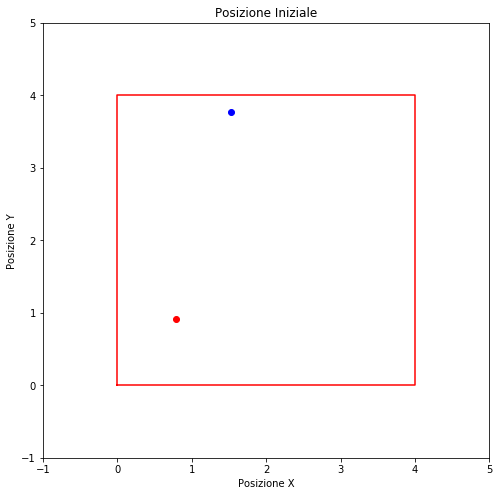

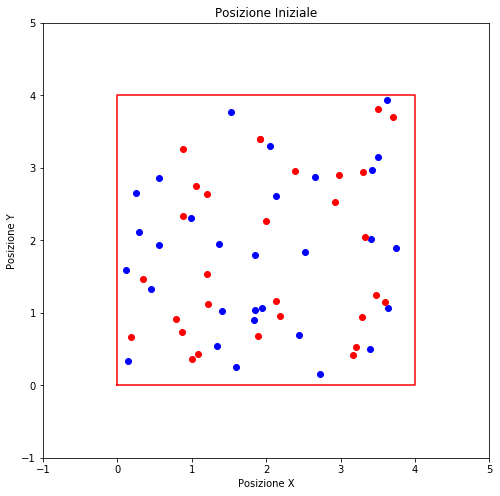

In [4]:
# inizializzazione random dei vari campi delle particelle
InizializzazioneParticelle(particelleA, particelleB, numeroPartA, numeroPartB, 0.025, 0.05);

# Disegna 2 particelle allo stato in iniziale
Disegna2Particelle(particelleA[1],particelleB[1]);

# Disegna tutte le particelle allo stato t iniziale
DisegnaTutteParticelle(particelleA, particelleB);

# inizio simulazione
CollisioneConParticelleEBordi(particelleA, particelleB, 0.025, 0.05);

# Studio del comportamento energetico

Come abbiamo detto prima non c'è dispersione di energia durante le collisioni elastiche infatti l'energia dell'intero sistema si conserva, specialmente l'energia cinetica e l'energia meccanica. Perciò non avremo nessuna variazione di energia cinetica e meccanica durante l'intero periodo della simulazione.

Fissi campioni ad intervallo Δ𝑡𝑠:
L'energia cinetica media Ex delle particelle lungo l'asse x è: 12𝑁𝑀∑𝑖𝑣2𝑖(𝑥)
L'energia cinetica media Ey delle particelle lungo l'asse y è: 12𝑁𝑀∑𝑖𝑣2𝑖(𝑦)
L'energia cinetica media E è : 12𝑁𝑀∑𝑖𝑣2
l'energia potenziale media Ui delle particelle è: 1𝑁𝑀𝑔∑𝑖𝑦𝑖
L'energia meccania media delle particelle è: ∑𝑖𝐸𝑘+𝑈𝑖

Nelle seguenti figure possiamo vedere che l'energia cinetica media rimane costante durante il tempo. Si noti che l'energia cinetica delle particelle blu è maggiore per via della loro massa superiore.

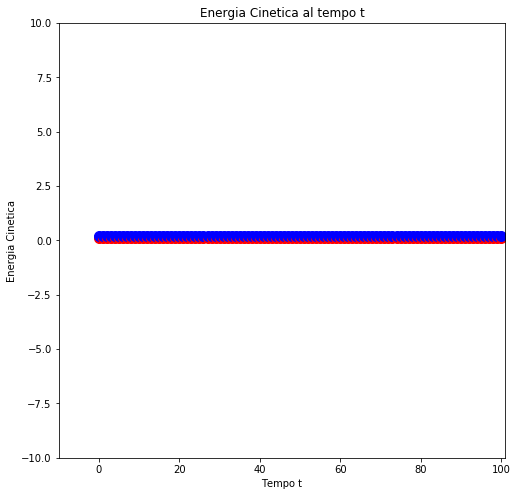

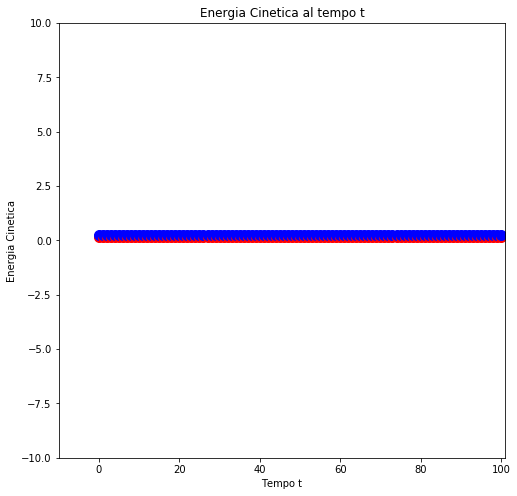

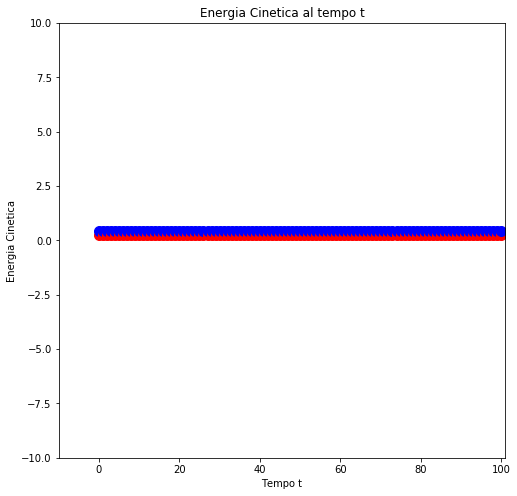

In [5]:
DisegnaConservazioneEnergiaCineticaX(particelleA, particelleB, 0.025, 0.05);
DisegnaConservazioneEnergiaCineticaY(particelleA, particelleB, 0.025, 0.05);
DisegnaConservazioneEnergiaCinetica(particelleA, particelleB, 0.025, 0.05);

Nelle seguenti figure vediamo che l'energia potenziale media e l'energia meccanica media rimangono costanti durante il tempo.

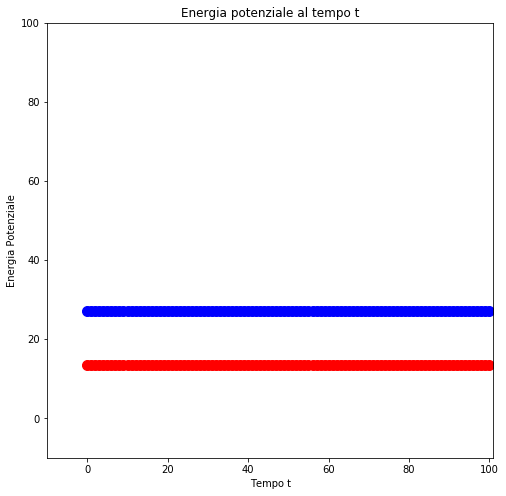

In [6]:
DisegnaEnergiaPotenziale(particelleA, particelleB, 0.025, 0.05);

# Animazione e Simulazione
Ora si mostrerà la simulazione delle particelle nel box con le possibili collisioni.

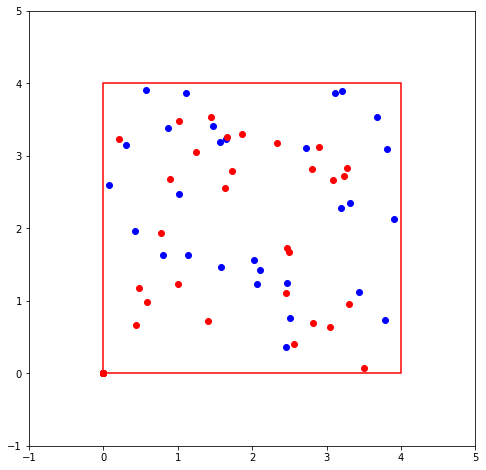

In [9]:
figura = plt.figure(figsize=(8,8))
assi = plt.axes(xlim=(-1,5), ylim=(-1,5))
linea = assi.plot([], [], 'bo')[0]
linea2 = assi.plot([], [], 'ro')[0]

# Per evitare errori:
# l'indice n è fuori dal limite per l'asse n 0 con dimensione n
if(dt == 0.01):
    valoreFrame = 101
elif(dt == 0.05):
    valoreFrame = 21
elif(dt == 0.1):
    valoreFrame = 11
    
DisegnaAnimazione = animation.FuncAnimation(figura,                  # Figura da disegnare
                                            animazione,              # chiamata a funzione
                                            frames = valoreFrame,    # Tempo per chiamare la funzione
                                            interval = 100)
plt.plot(boxX, boxY, 'r-')
HTML(DisegnaAnimazione.to_html5_video())